# top

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def view_frame(frame, h=10, w=12):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(h, w))
    plt.imshow(frame_rgb)
    plt.gca().xaxis.set_ticks_position('both')
    plt.tick_params(top=True, labeltop=True)
    plt.show()

In [ ]:
def show_frames_side_by_side(frame1, frame2, title1='Frame 1', title2='Frame 2'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 10))
    
    frame1_rgb = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2_rgb = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
    
    ax1.imshow(frame1_rgb)
    ax1.set_title(title1)
    ax1.axis('on')
    ax1.xaxis.set_ticks_position('both')
    ax1.xaxis.set_ticks_position('both')
    ax1.tick_params(top=True, labeltop=True)

    ax2.imshow(frame2_rgb)
    ax2.set_title(title2)
    ax2.axis('on')
    ax2.xaxis.set_ticks_position('both')
    ax2.tick_params(top=True, labeltop=True)
    
    plt.tight_layout()
    plt.show()

In [ ]:
def get_frame(cap, n):
    cap.set(cv2.CAP_PROP_POS_FRAMES, n)
    r, f = cap.read()
    t = elapsed_time(cap)
    return r, f, t

# Mask range for a ball
lower_yellow_green = np.array([30, 40, 40])
upper_yellow_green = np.array([80, 255, 255])

def convert_to_hsv(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

def masked(hsv_frame, lower, upper):
    return cv2.inRange(hsv_frame, lower, upper)

def elapsed_time(cap):
    return cap.get(cv2.CAP_PROP_POS_MSEC)

def get_mask(cap, n):
    ret, frame_n, t = get_frame(cap, n)
    hsv_n = convert_to_hsv(frame_n)
    mask_n = masked(hsv_n, lower_yellow_green, upper_yellow_green)
    return mask_n, t

def get_moments(msk):
    moments = cv2.moments(msk)
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    return cx, cy

def detect(mask):
    # Find centroid
    # cx, cy = get_moments(mask)
    
    # Find contours and fit circle for radius
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)
        radius = int(radius)
    else:
        radius = 0
    return x, y, radius

In [ ]:
def add_circle(frame, x, y, r, circle_color = (0, 255, 0), centroid_color = (255, 0, 0)):
    result = frame.copy()
    cv2.circle(result, (x,y), r, circle_color, 2)  # Green circle
    cv2.circle(result, (x,y), 5, centroid_color, -1)  # Blue centroid dot
    
    return result

In [ ]:
freefall_path = "../data/freefall.mp4"


In [ ]:
cap = cv2.VideoCapture(freefall_path)

In [ ]:
n = 32

In [ ]:
#| export
def find_ball(cap, n):
    ret, frame_n, t = get_frame(cap, n)
    if not ret: return False
    mask_n, t = get_mask(cap, n)
    x, y, r = detect(mask_n)
    print(f"{n:2d}, {t:7.2f}, {x:7.2f}, {y:7.2f}, {r:3d}")
    return True

In [ ]:
for n in range(74):
    if not find_ball(cap, n): break
print("done")

 0,    0.00, 1100.50,    0.50,  40


 1,   16.68, 1102.00,    0.50,  41


 2,   33.37, 1103.00,    0.50,  42


 3,   50.05, 1100.50,    4.90,  39


 4,   66.73, 1104.50,    1.50,  43


 5,   83.42, 1101.50,    8.50,  41


 6,  100.10, 1103.00,    8.50,  42


 7,  116.78, 1101.50,    8.50,  43


 8,  133.47, 1101.00,    8.50,  43


 9,  150.15, 1100.50,    8.50,  44


10,  166.83, 1097.50,    7.50,  42


11,  183.52, 1098.00,    9.50,  45


12,  200.20, 1096.50,   10.50,  45


13,  216.88, 1096.00,   10.50,  46


14,  233.57, 1094.50,   12.50,  46


15,  250.25, 1096.50,    9.50,  49


16,  266.93, 1097.00,    8.50,  50


17,  283.62, 1097.50,    5.50,  50


18,  300.30, 1095.50,    7.50,  51


19,  316.98, 1093.00,   14.50,  51


20,  333.67, 1094.00,    5.50,  53


21,  350.35, 1094.00,    6.50,  52


22,  367.03, 1093.83,    7.08,  52


23,  383.72, 1093.50,    6.50,  51


24,  400.40, 1092.00,    5.50,  53


25,  417.08, 1091.00,    6.50,  53


26,  433.77, 1088.66,    9.90,  53


27,  450.45, 1086.89,   12.25,  55


28,  467.13, 1088.58,   22.67,  58


29,  483.82, 1084.29,   36.48,  58


30,  500.50, 1083.56,   54.17,  59


31,  517.18, 1083.12,   77.30,  61


32,  533.87, 1077.42,  102.01,  59


33,  550.55, 1076.28,  134.63,  59


34,  567.23, 1077.24,  172.10,  59


35,  583.92, 1073.28,  212.44,  58


36,  633.97, 1066.59,  359.88,  58


37,  650.65, 1063.46,  417.16,  58


38,  667.33, 1062.43,  479.78,  59


39,  684.02, 1058.87,  542.79,  60


40,  700.70, 1056.50,  612.23,  60


41,  717.38, 1053.78,  684.60,  60


42,  734.07, 1050.01,  761.94,  60


43,  750.75, 1045.79,  844.79,  61


44,  767.43, 1046.42,  928.84,  60


45,  784.12, 1039.89, 1020.49,  60


46,  800.80, 1037.00, 1112.50,  61


47,  817.48, 1038.15, 1209.04,  63


48,  834.17, 1032.17, 1309.23,  61


49,  850.85, 1028.20, 1415.87,  61


50,  867.53, 1022.07, 1525.51,  61


51,  884.22, 1019.27, 1639.22,  61


52,  900.90, 1013.28, 1756.37,  60


53,  917.58, 1010.83, 1875.30,  61


54,  934.27, 1005.50, 2001.50,  60


55,  950.95, 1000.30, 2128.28,  62


56,  967.63,  996.22, 2259.51,  62


57,  984.32,  990.05, 2396.47,  61


58, 1001.00,  985.78, 2536.19,  61


59, 1017.68,  980.13, 2679.28,  62


60, 1034.37,  976.50, 2825.50,  62


61, 1051.05,  969.04, 2976.74,  64


62, 1067.73,  967.00, 3129.00,  62


63, 1117.78,  948.34, 3614.68,  63


64, 1134.47,  941.51, 3783.49,  63


65, 1151.15,  941.00, 3831.50,  56


done


I want to collect that data in a pandas data frame. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great idea! A pandas DataFrame will make it much easier to analyze and visualize the data.

You can modify your `find_ball` function to collect the data in a list, then convert it to a DataFrame. Here's how you could start:

```python
import pandas as pd

data = []
for n in range(74):
    ret, frame_n, t = get_frame(cap, n)
    if not ret: break
    mask_n, t = get_mask(cap, n)
    x, y, r = detect(mask_n)
    data.append({'frame': n, 'time': t, 'x': x, 'y': y, 'radius': r})

df = pd.DataFrame(data)
```

Would you like to try writing this yourself, or would you like me to provide the complete code?

In [ ]:
import pandas as pd

data = []
for n in range(74):
    ret, frame_n, t = get_frame(cap, n)
    if not ret: break
    mask_n, t = get_mask(cap, n)
    x, y, r = detect(mask_n)
    data.append({'frame': n, 'time': t, 'x': x, 'y': y, 'radius': r})

df = pd.DataFrame(data)

In [ ]:
df.describe()

,frame,time,x,y,radius
count,66.000000,66.000000,66.000000,66.000000,66.000000
mean,32.500000,558.891667,1057.632703,813.267510,54.681818
std,19.196354,337.370979,47.285026,1116.716589,7.504171
min,0.000000,0.000000,941.000000,0.500000,39.000000
25%,16.250000,271.104167,1029.188568,8.500000,50.000000
50%,32.500000,542.208333,1077.333618,118.323502,58.000000
75%,48.750000,846.679167,1095.875000,1389.213867,61.000000
max,65.000000,1151.150000,1104.500000,3831.500000,64.000000


i want to create column v, with value of x[same row] - x[same row -1] in df

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

You can calculate the difference between consecutive x values using pandas' `diff()` method:

```python
df['v'] = df['x'].diff()
```

This will create a new column `v` that contains the change in x position from the previous frame. The first row will be `NaN` since there's no previous value to subtract from.

Would you like to see the result, or do you have questions about how `diff()` works?

In [ ]:
df.plot(x='t', y='y')

KeyError: 't'

In [ ]:
def view_masked(cap, n):
    ret, frame_n, t = get_frame(cap, n)
    mask_n, t = get_mask(cap, n)
    # view_frame(mask_n, 3, 5)
    print(f"t {t} ms")
    x, y, r = detect(mask_n)
    x = int(x)
    y = int(y)
    print("xyr", x, y, r)
    res = add_circle(frame_n, x, y, r)
    slice_top = max(0, y-100)
    view_frame(res[slice_top:slice_top+200, 600:1500], 10, 10)
    print(t, x, y, r)

t 967.6333333333333 ms
xyr 996 2259 62


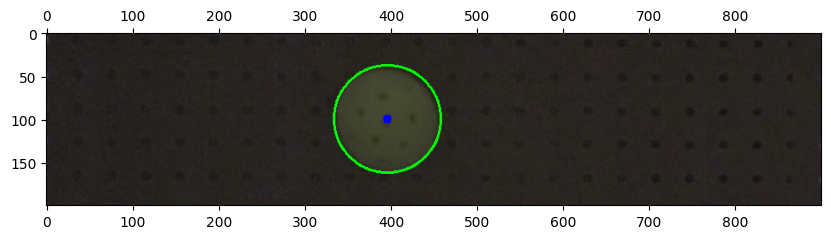

967.6333333333333 996 2259 62


In [ ]:

n = input("frame no")
n = int(n)
view_masked(cap, n)

t 967.6333333333333 ms
xyr 996 2259 62


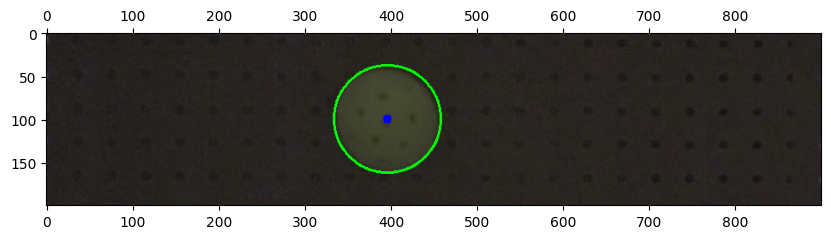

967.6333333333333 996 2259 62


In [ ]:

n = input("frame no")
n = int(n)
view_masked(cap, n)

In [ ]:
cap.release()
cap = cv2.VideoCapture(freefall_path)
r = True
t = []
while r:
    r,f = cap.read()
    if r: t.append(cap.get(cv2.CAP_PROP_POS_MSEC))

In [ ]:
type(n)

int

<Axes: xlabel='time'>

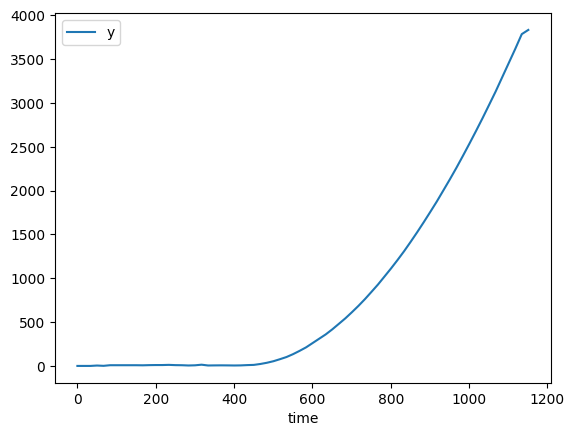

In [ ]:
df.plot(x='time', y='y')

<Axes: xlabel='time'>

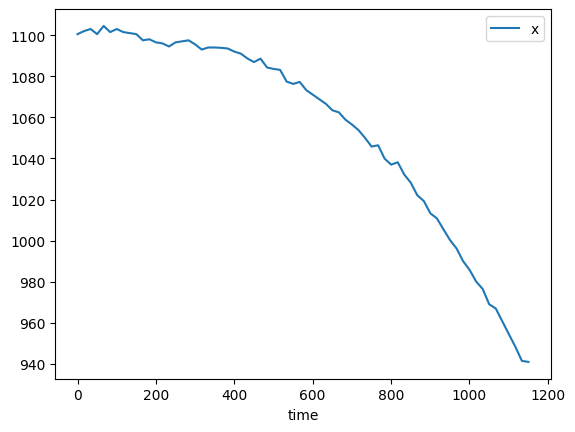

In [ ]:
df.plot(x='time', y='x')

In [ ]:
df.head(3)


,frame,time,x,y,radius
0,0,0.000000,1100.5,0.5,40
1,1,16.683333,1102.0,0.5,41
2,2,33.366667,1103.0,0.5,42


In [ ]:
df['v'] = df['x'].diff()
df['a'] = df['v'].diff()


<Axes: xlabel='time'>

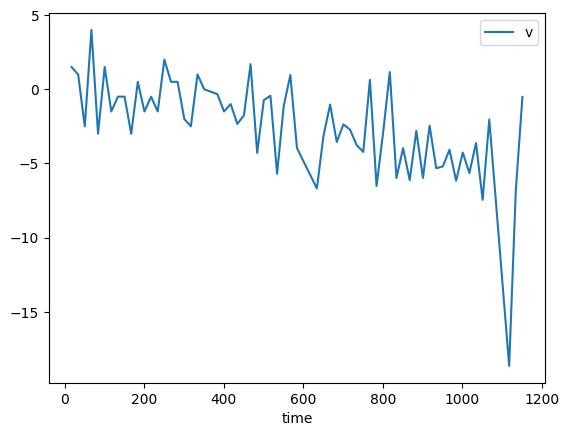

In [ ]:

df.plot(x='time', y='v')

<Axes: xlabel='time'>

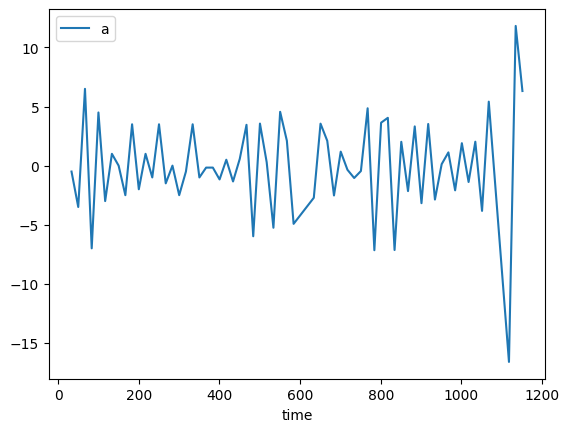

In [ ]:

df.plot(x='time', y='a')

<Axes: xlabel='v', ylabel='a'>

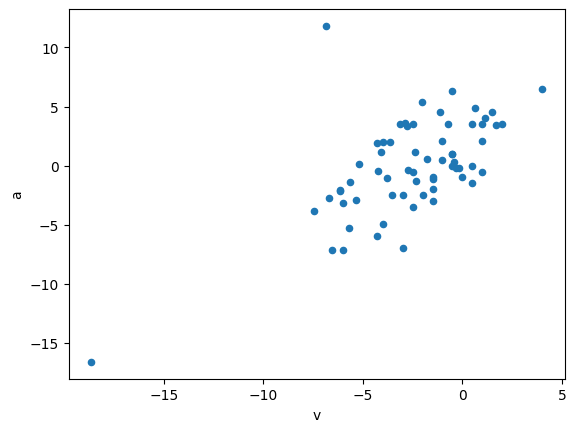

In [ ]:

df.plot.scatter(x='v', y='a')

In [ ]:
df.describe()

,frame,time,x,y,radius,v,a
count,66.000000,66.000000,66.000000,66.000000,66.000000,65.000000,64.000000
mean,32.500000,558.891667,1057.632703,813.267510,54.681818,-2.453846,-0.031476
std,19.196354,337.370979,47.285026,1116.716589,7.504171,3.295942,4.156648
min,0.000000,0.000000,941.000000,0.500000,39.000000,-18.655334,-16.613098
25%,16.250000,271.104167,1029.188568,8.500000,50.000000,-4.080017,-2.240677
50%,32.500000,542.208333,1077.333618,118.323502,58.000000,-2.339355,-0.082886
75%,48.750000,846.679167,1095.875000,1389.213867,61.000000,-0.441162,3.353912
max,65.000000,1151.150000,1104.500000,3831.500000,64.000000,4.000000,11.825134


<Axes: >

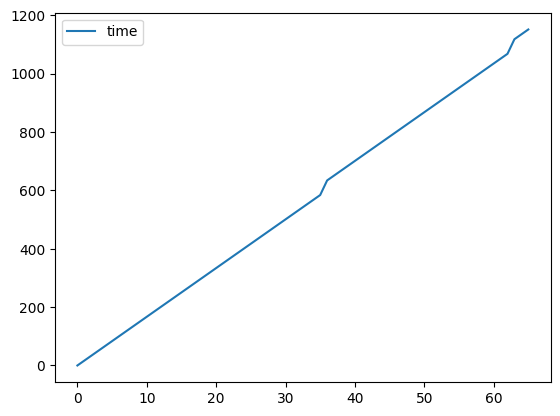

In [ ]:
df.plot(y='time')